In [5]:
import sqlite3
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from tqdm import tqdm
from gensim.models import Word2Vec

In [6]:
conn = sqlite3.connect("final_2.sqlite")

In [7]:
data_frame = pd.read_sql_query("SELECT * FROM Reviews",conn)

In [8]:
data_frame["Cleaned_text"][0]

'why is this when the same product is available for here victor and traps are unreal of course total fly genocide pretty stinky but only right nearby'

In [9]:
data_frame.shape

(4986, 12)

In [10]:
### BOW
count = CountVectorizer(min_df = 3)
count.fit(data_frame["Cleaned_text"])
bow_vector = count.transform(data_frame["Cleaned_text"])
bow_vector.shape

(4986, 5286)

In [11]:
#### reducing bow to 2_D

In [12]:
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 5 , n_iter = 5000)
two_d_bow = model.fit_transform(bow_vector)

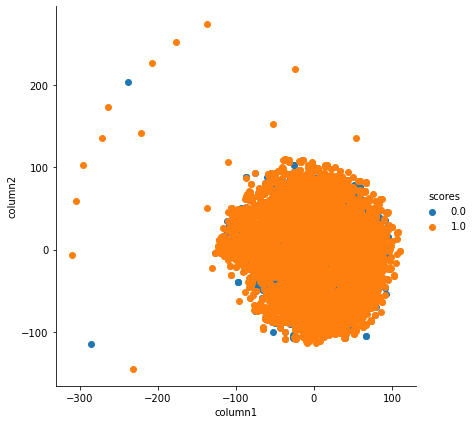

In [13]:
final_bow = np.vstack((two_d_bow.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bow , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

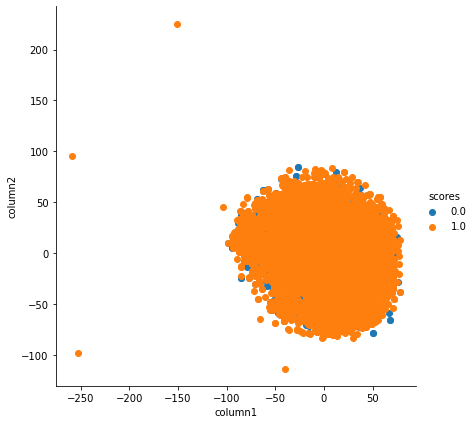

In [14]:
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 10 , n_iter = 5000)    ### bow with perplexity is 10
two_d_bow = model.fit_transform(bow_vector)
final_bow = np.vstack((two_d_bow.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bow , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

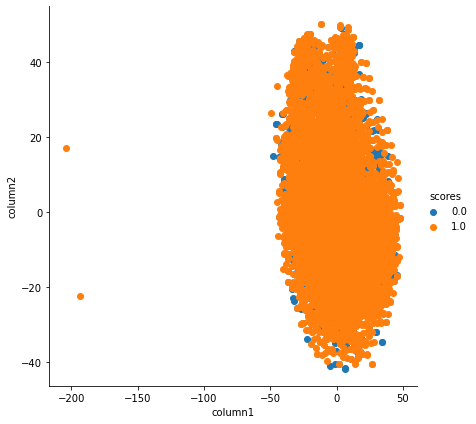

In [15]:
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 30 , n_iter = 5000)    ### bow with perplexity is 30
two_d_bow = model.fit_transform(bow_vector)
final_bow = np.vstack((two_d_bow.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bow , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

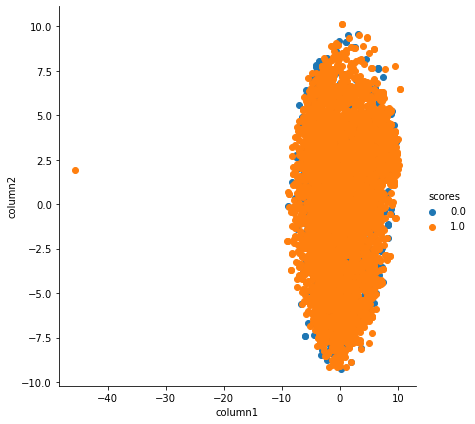

In [16]:
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 100 , n_iter = 2000)    ### bow with perplexity is 100
two_d_bow = model.fit_transform(bow_vector)
final_bow = np.vstack((two_d_bow.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bow , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

In [17]:
## bigram
count = CountVectorizer(ngram_range= (1,2) ,min_df = 5)
count.fit(data_frame["Cleaned_text"])
bigram_vector = count.transform(data_frame["Cleaned_text"])
bigram_vector.shape

(4986, 13857)

In [18]:
### bigram with perplexity = 5

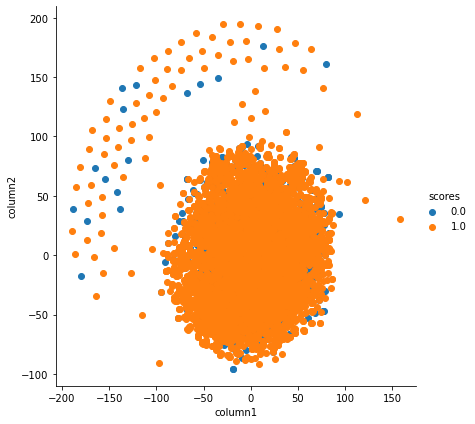

In [19]:
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 5 , n_iter = 2000)    
two_d_bigram = model.fit_transform(bigram_vector)
final_bigram = np.vstack((two_d_bigram.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

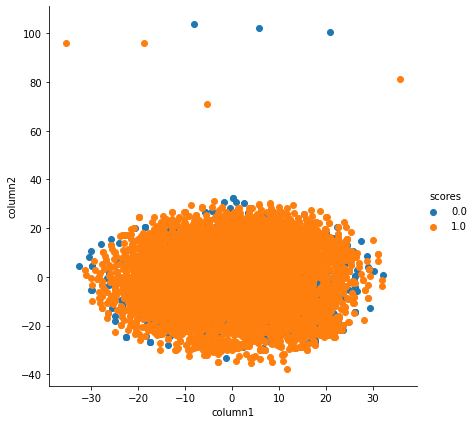

In [20]:
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 30 , n_iter = 2000)     ## perplexity =30
two_d_bigram = model.fit_transform(bigram_vector)
final_bigram = np.vstack((two_d_bigram.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

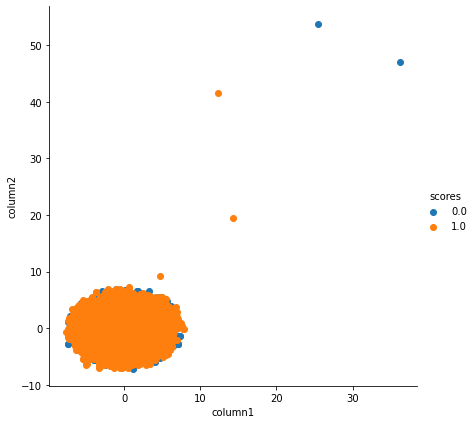

In [21]:
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 100 , n_iter = 2000)     ## perplexity =100
two_d_bigram = model.fit_transform(bigram_vector)
final_bigram = np.vstack((two_d_bigram.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

In [22]:
### tfidf
tfidf  = TfidfVectorizer(ngram_range = (1,2) , min_df = 5)
tfidf_model = tfidf.fit(data_frame["Cleaned_text"])
print("some feature names of the tfidf are" ,tfidf_model.get_feature_names()[0:10])

tfidf_vector = tfidf_model.transform(data_frame["Cleaned_text"])
print("the shape of tfidf vector is", tfidf_vector.shape)

some feature names of the tfidf are ['ability', 'ability to', 'able', 'able to', 'about', 'about all', 'about any', 'about anything', 'about as', 'about buying']
the shape of tfidf vector is (4986, 13857)


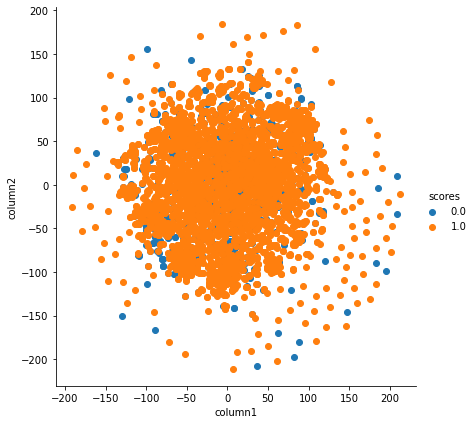

In [23]:
### ploting tfidf with perplexity =5
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 5 , n_iter = 2000)     
two_d_tfidf = model.fit_transform(tfidf_vector)
final_bigram = np.vstack((two_d_tfidf.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

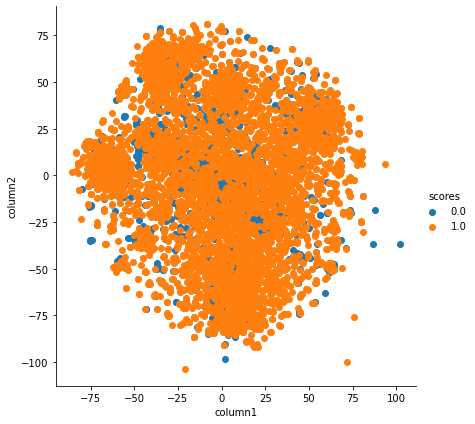

In [24]:
### ploting tfidf with perplexity =30
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 30 , n_iter = 2000)     
two_d_tfidf = model.fit_transform(tfidf_vector)
final_bigram = np.vstack((two_d_tfidf.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

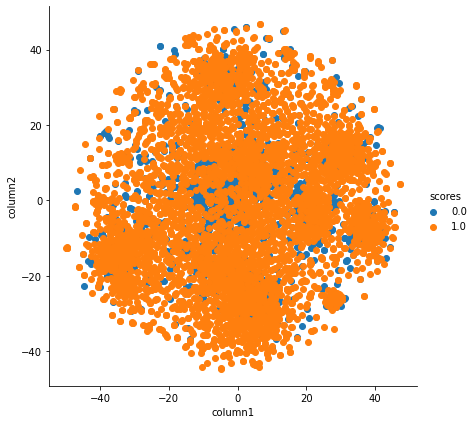

In [25]:
### ploting tfidf with perplexity =100
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 100 , n_iter = 2000)     
two_d_tfidf = model.fit_transform(tfidf_vector)
final_bigram = np.vstack((two_d_tfidf.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

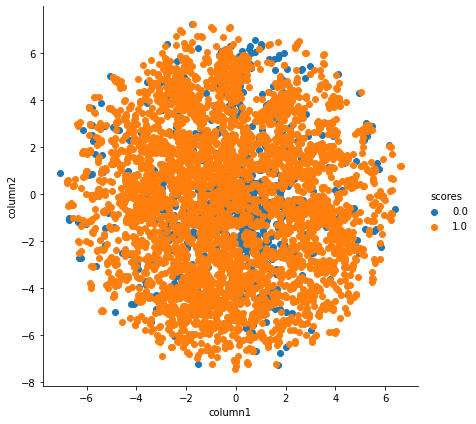

In [26]:
### ploting tfidf with perplexity =500
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 500 , n_iter = 2000)     
two_d_tfidf = model.fit_transform(tfidf_vector)
final_bigram = np.vstack((two_d_tfidf.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

In [27]:
### w2v
texts = data_frame["Cleaned_text"]
i=0
list_of_sentence = []
for sentence in texts:
    list_of_sentence.append(sentence.split())
w2v = Word2Vec(list_of_sentence , size= 50 , min_count = 5)
w2v_words = list(w2v.wv.vocab)

In [28]:
### average w2v

total_vector = []
for sentance in tqdm(list_of_sentence):
    sen_vector = np.zeros(50)
    count = 0
    for word in sentance:
        if word in w2v_words:
            count = count + 1
            sen_vector = sen_vector + w2v.wv[word]
        if count != 0:
            sen_vector = sen_vector/count
    total_vector.append(sen_vector)

100%|█████████████████████████████████████████████████████████████████████████████| 4986/4986 [00:29<00:00, 171.92it/s]


In [29]:
print(len(total_vector))
print(len(total_vector[0]))

4986
50


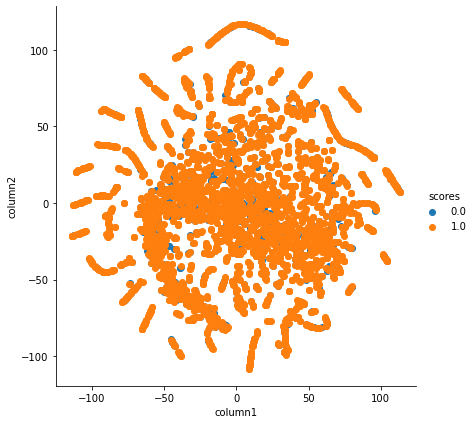

In [30]:
### ploting average_w2v with perplexity =10
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 10 , n_iter = 1000)     
two_d_average_w2v = model.fit_transform(total_vector)
final_bigram = np.vstack((two_d_average_w2v.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

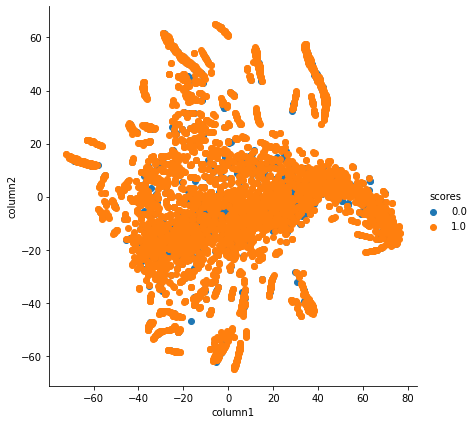

In [31]:
### ploting average_w2v with perplexity =50
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 50 , n_iter = 1000)     
two_d_average_w2v = model.fit_transform(total_vector)
final_bigram = np.vstack((two_d_average_w2v.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

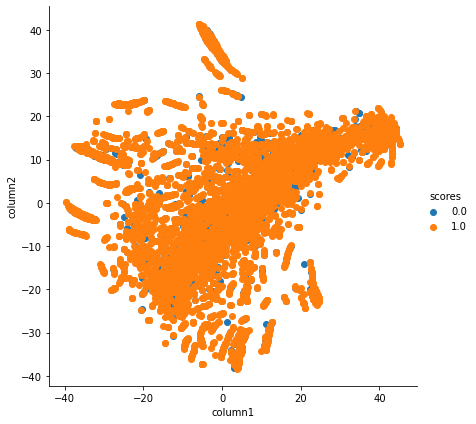

In [32]:
### ploting average_w2v with perplexity =150
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 150 , n_iter = 1000)     
two_d_average_w2v = model.fit_transform(total_vector)
final_bigram = np.vstack((two_d_average_w2v.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

In [33]:
#### tfidf weighted w2v


model = TfidfVectorizer()
model.fit(data_frame["Cleaned_text"])
#### now we are zipping words with their idf_ value pay attention it is not tfidf value
dictionary = dict(zip(model.get_feature_names(),list(model.idf_)))

tfidf_weighted_w2v = []
tfidf_feat = model.get_feature_names()
for sent in tqdm(list_of_sentence):
    sentance_vector = np.zeros(50)
    tfidf_sum = 0
    for word in sent:
        if word in w2v_words and word in tfidf_feat:
            tfidf = dictionary[word]*(sent.count(word)/len(sent))
            sentance_vector += (w2v.wv[word]*tfidf)
            tfidf_sum += tfidf
        if tfidf_sum != 0:
            sentance_vector /= tfidf_sum
    tfidf_weighted_w2v.append(sentance_vector)
            

100%|██████████████████████████████████████████████████████████████████████████████| 4986/4986 [05:51<00:00, 14.18it/s]


In [34]:
### some rows of this vectors contain nan or infinity or zero value 

In [35]:
np.isnan(tfidf_weighted_w2v).any()

False

In [36]:
nan_tuple = np.where(np.isnan(tfidf_weighted_w2v))

In [37]:
print(nan_tuple)

(array([], dtype=int64), array([], dtype=int64))


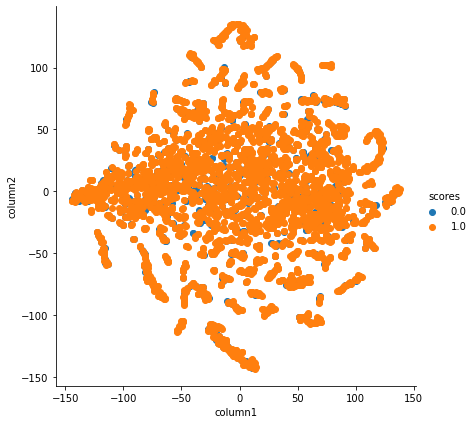

In [38]:
### ploting average_w2v with perplexity =150
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 10 , n_iter = 2000)     
two_d_tfidf_w2v = model.fit_transform(tfidf_weighted_w2v)
final_bigram = np.vstack((two_d_tfidf_w2v.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

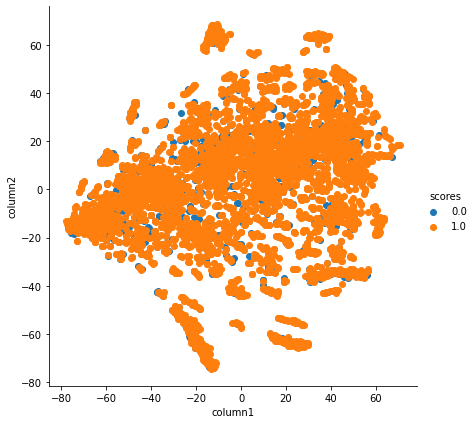

In [39]:
### ploting average_w2v with perplexity =50
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 50 , n_iter = 2000)     
two_d_tfidf_w2v = model.fit_transform(tfidf_weighted_w2v)
final_bigram = np.vstack((two_d_tfidf_w2v.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()

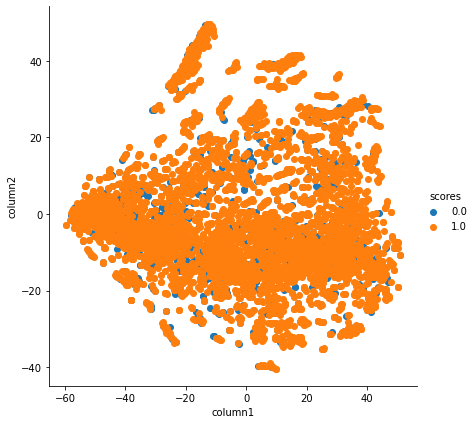

In [40]:
### ploting average_w2v with perplexity =100
model = TSNE(n_components = 2 , random_state = 2 , perplexity = 100 , n_iter = 2000)     
two_d_tfidf_w2v = model.fit_transform(tfidf_weighted_w2v)
final_bigram = np.vstack((two_d_tfidf_w2v.T ,data_frame["Score"])).T
df_final = pd.DataFrame(data = final_bigram , columns = ("column1" , "column2" , "scores"))
sns.FacetGrid( df_final , hue = "scores" , height = 6).map(plt.scatter , "column1" , "column2").add_legend()
plt.show()